In [22]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

In [23]:
def f0(x):
    return 1

def los0(x,alpha,beta,L):
    return (x**2)/2 + (beta - alpha - (L**2)/2)*x/L + alpha

In [24]:
def f1(x):
    return x

def los1(x,alpha,beta,L):
    return (x**3)/6 + (beta - alpha - (L**3)/6)*x/L + alpha

In [25]:
def f2(x): #Här skapar vi en testfunktion 
    return x**2

def los2(x,alpha,beta,L): #Här definierar vi den exakta lösningen till ovanstående testfunktion
    return (x**4)/12 + (beta - alpha - (L**4)/12)*x/L + alpha


In [29]:
def twopBVP(fvec, alpha, beta, L, N):
    deltaX = L/(N+1)
    T = np.eye(N)*(-2) 
    for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
        T[i+1,i] = 1
        T[i, i+1] = 1
    T[N-1,N-1] = 0
    print(T)
    eig = scipy.linalg.eigvals(T)
    print(eig)
    y = np.linalg.inv(T)@fvec
    y = np.insert(y, 0, alpha)
    #y = np.append(y,beta) 
    
    return  y #Detta löser ekvationen och spottar ut en vektor innehållande y(i). 

def fvecgen(f,alpha, beta, L, N): #Tanken är att denna ska generera högerledet som man sedan stoppar in i twopBVP för att lösa. 
    deltaX = L/(N)
    fvec = np.zeros((N,1))
    Xvec = np.linspace(deltaX,L,N)
    for i in range(len(Xvec)):  #Fyller fvec med funktionsvärdena F(x1) till F(xN-1)
        fvec[i] = f(Xvec[i])
    fvec[0] = -alpha/(deltaX**2) + fvec[0] #Första elementet i fvec fixar vi manuellt. 
    Xvec = np.insert(Xvec, 0, 0)
    return fvec, Xvec

    
    

In [33]:
N = 10
T = np.eye(N)*(-2) 
for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
    T[i+1,i] = 1
    T[i, i+1] = 1
T[N-1,N-1] = 0
print(T)
eig = scipy.linalg.eigvals(T)
print(eig)


[[-2.  1. -0. -0. -0. -0. -0. -0. -0. -0.]
 [ 1. -2.  1. -0. -0. -0. -0. -0. -0. -0.]
 [-0.  1. -2.  1. -0. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -2.  1. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -2.  1. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1. -2.  1. -0. -0. -0.]
 [-0. -0. -0. -0. -0.  1. -2.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1. -2.  1. -0.]
 [-0. -0. -0. -0. -0. -0. -0.  1. -2.  1.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  1.  0.]]
[-3.90825825+0.j -3.64120977+0.j -3.2226663 +0.j -2.6899877 +0.j
 -2.09083263+0.j -1.47909621+0.j -0.91058465+0.j -0.4394611 +0.j
 -0.11790233+0.j  0.49999893+0.j]


[[-2.  1. -0. -0.]
 [ 1. -2.  1. -0.]
 [-0.  1. -2.  1.]
 [-0. -0.  1.  0.]]
[-3.49550766+0.j -2.21968687+0.j -0.78031313+0.j  0.49550766+0.j]


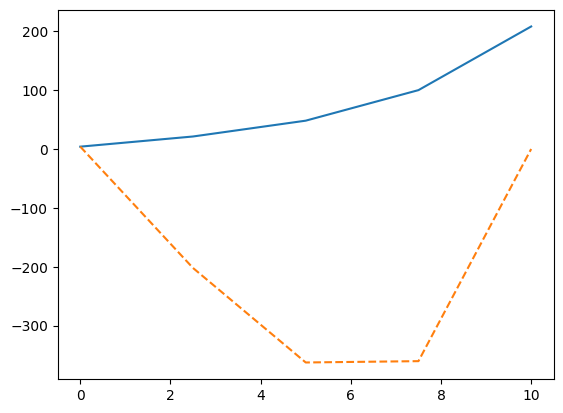

In [31]:
f = f2
alpha = 4
beta = 0
N = 4
L = 10
fvec, Xvec = fvecgen(f, alpha, beta, L, N)
y = twopBVP(fvec, alpha, beta, L, N)

plt.plot(Xvec, y)
plt.plot(Xvec, los2(Xvec,alpha,beta,L), '--')
